In [ ]:
from google.colab import drive
drive.mount('/content/svm')


Drive already mounted at /content/svm; to attempt to forcibly remount, call drive.mount("/content/svm", force_remount=True).


**1.Introduction to SVM:** Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.**


**2.Necessary imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**3.About The Cancer Data**

Field name	 :Description

ID	          :identifier

Clump	        :Clump thickness

UnifSize	    :Uniformity of cell size

UnifShape	    :Uniformity of cell shape

MargAdh	      :Marginal adhesion

SingEpiSize	  :Single epithelial cell size

BareNuc	      :Bare nuclei

BlandChrom	  :Bland chromatin

NormNucl	    :Normal nucleoli

Mit	          :Mitoses

Class	        :Benign or malignant


**4.Load Data From CSV File**

In [ ]:
#The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

#The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4)

df=pd.read_csv("/content/svm/MyDrive/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:

#maligna here is 4 and mild 2
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
Clump,0
UnifSize,0
UnifShape,0
MargAdh,0
SingEpiSize,0
BareNuc,0
BlandChrom,0
NormNucl,0
Mit,0


In [ ]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.shape
df.size
df.columns
df.dtypes
df.count()

,0
ID,699
Clump,699
UnifSize,699
UnifShape,699
MargAdh,699
SingEpiSize,699
BareNuc,699
BlandChrom,699
NormNucl,699
Mit,699


In [ ]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [ ]:
df['Class'].value_counts()

,count
Class,
2,458
4,241


**5.Distribution Of the Classes**

<Axes: xlabel='Clump', ylabel='UnifSize'>

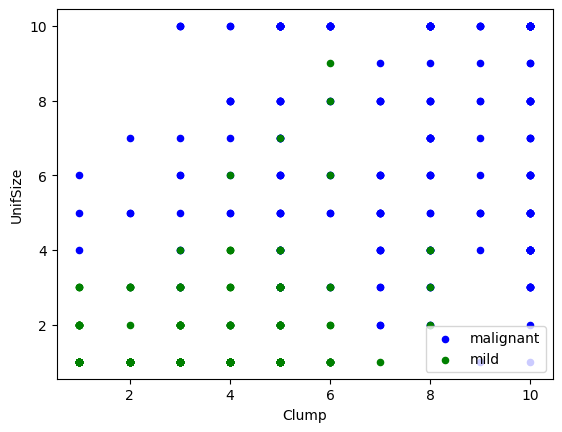

In [ ]:
malignant_df=df[df['Class']==4][0:500]
mild_df=df[df['Class']==2][0:500]

axes=malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='malignant')
mild_df.plot(kind='scatter',x='Clump',y='UnifSize',color='green',label='mild',ax=axes)

**identifying unwanted rows**

In [ ]:
df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,object
BlandChrom,int64
NormNucl,int64
Mit,int64


In [ ]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

<ipython-input-153-18e0b8fc6dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc']=df['BareNuc'].astype('int')


,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


**Removing unwanted columns**

In [ ]:
# Display the columns of the DataFrame
df.columns

# Select only the specified 9 columns from the original DataFrame, removing 2 columns
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
                  'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Convert the selected features DataFrame to a NumPy array for use in machine learning
X = np.asarray(feature_df)

# Convert the target variable 'Class' to a NumPy array
y = np.asarray(df['Class'])

# Display the first 5 rows of the independent variable array
X[0:5]

# Display the first 8 rows of the dependent variable array
y[0:8]


array([2, 2, 2, 2, 2, 4, 2, 2])

In [ ]:
# Display the first 5 rows of the dependent variable array
y[0:5]

array([2, 2, 2, 2, 2])

**Divide the data as Training / Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=4)
# 546 * 9
train_x.shape
# 546 * 1
train_y.shape

# 137 * 9
test_x.shape
# 137 * 1
test_y.shape

(137,)

**Modeling (SVM with scikit-learn)**

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',gamma='auto',C=2)# svc(support vector classiffier): those data points near to hyperplave whose perpendicular distance to hypa plane if we sum up and maximize
clf.fit(train_x,train_y)
y_predict=clf.predict(test_x)

**creating confusion matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y,y_predict))
print(classification_report(test_y,y_predict))

[[85  5]
 [ 0 47]]
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



**A confusion matrix** :is a table used to evaluate the performance of a classification model. It summarizes the predictions made by the model against the actual outcomes, showing the counts of true positives, true negatives, false positives, and false negatives.

Here's a breakdown of its components:

**True Positives (TP):** Correctly predicted positive cases.
**True Negatives (TN):** Correctly predicted negative cases.

**False Positives (FP):** Incorrectly predicted positive cases (type I error).

**False Negatives (FN):** Incorrectly predicted negative cases (type II error).

**Evaluating the results**

In [ ]:
# Performance metrics for a classification model

# For class 2:
#precision: 1.00    # This indicates that all instances predicted as class 2 were actually class 2 (perfect precision).
#recall: 0.94       # Out of all actual instances of class 2, 94% were correctly predicted by the model.
#f1-score: 0.97     # The F1 score (harmonic mean of precision and recall) shows that the model performs very well for class 2.
#support: 90        # There were 90 actual instances of class 2 in the test set.

# For class 4:
#precision: 0.90    # 90% of the instances predicted as class 4 were correct, indicating good precision.
#recall: 1.00       # The model correctly identified all actual instances of class 4 (perfect recall).
#f1-score: 0.95     # The F1 score for class 4 shows a strong balance between precision and recall.
#support: 47        # There were 47 actual instances of class 4 in the test set.

# Overall performance metrics:
#accuracy: 0.96     # The model correctly predicted 96% of all instances across both classes.

# Macro average metrics (average performance across classes, unweighted):
#macro avg:         # This provides an average performance across classes without considering their support.
#precision: 0.95    # The average precision across both classes is 95%.
#recall: 0.97       # The average recall across both classes is 97%.
#f1-score: 0.96     # The average F1 score across both classes is 96%.

# Weighted average metrics (average performance across classes, weighted by support):
#weighted avg:      # This average takes into account the number of instances (support) for each class.
#precision: 0.97    # The overall precision is influenced more by class 2, which had a higher support.
#recall: 0.96       # The overall recall takes into account the number of instances for both classes.
#f1-score: 0.96     # The overall F1 score indicates a solid balance in performance across both classes.

# The report suggests that the model is performing well, especially for class 2, with strong metrics overall.


**Saving SVM Model**

In [ ]:
from sklearn.metrics import accuracy_score
import joblib

# Save the model
joblib.dump(clf, 'svm_cancer_model.pkl')

# Optionally, evaluate the model
accuracy = accuracy_score(test_y, y_predict)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


**Loading the Model**

In [ ]:
# Load the model
loaded_model = joblib.load('svm_cancer_model.pkl')

# Use the loaded model to make predictions
new_predictions = loaded_model.predict(test_x)
new_predictions

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

In [ ]:
import pandas as pd
import joblib

# Load the new CSV file into a DataFrame
df_new = pd.read_csv('/content/svm/MyDrive/svm(cancer)/sample_cancer_test_model_accuracy_data.csv')

# Display the first few rows of the data to confirm it loaded correctly
print(df_new.head())

# Select only the relevant features for prediction (excluding 'ID' and 'Class' since we are predicting 'Class')
X_new = df_new[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
                'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Load your previously saved SVM model
loaded_model = joblib.load('svm_cancer_model.pkl')

# Use the loaded model to make predictions on the new data
predictions = loaded_model.predict(X_new)

# Display the predictions (2 = Benign, 4 = Malignant)
print("Predicted Cancer Classes: ", predictions)

# Add the predictions as a new column to the DataFrame
df_new['Predicted_Class'] = predictions

# Display the first few rows of the DataFrame with predictions
print(df_new[['ID', 'Predicted_Class']].head())


     ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  \
0  1001      5         4          4        5            3       10   
1  1002      3         1          1        1            2        2   
2  1003      8        10         10        8            7        9   
3  1004      7         6          6        4            5        6   
4  1005      4         2          2        3            2        1   

   BlandChrom  NormNucl  Mit  
0           3         1    1  
1           2         1    1  
2           8        10   10  
3           7         6    5  
4           2         3    1  
Predicted Cancer Classes:  [4 2 4 4 2]
     ID  Predicted_Class
0  1001                4
1  1002                2
2  1003                4
3  1004                4
4  1005                2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


**Distribution of Predicted Classes**

In [165]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-166-3980bbebd76e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x='Predicted_Class', palette='viridis')


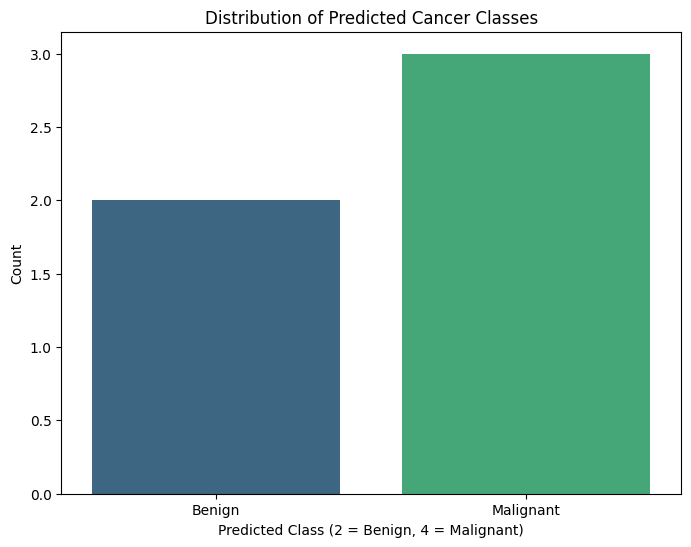

In [166]:
# Visualize the distribution of predicted classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df_new, x='Predicted_Class', palette='viridis')
plt.title('Distribution of Predicted Cancer Classes')
plt.xlabel('Predicted Class (2 = Benign, 4 = Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])  # Customize labels if needed
plt.show()


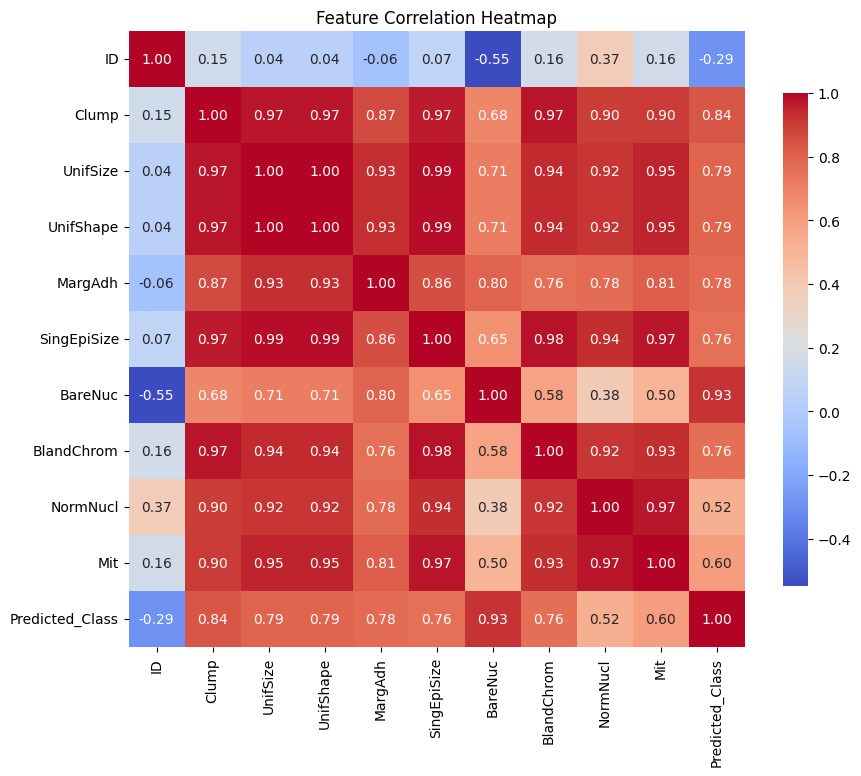

In [167]:
# Calculate correlations
correlation_matrix = df_new.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap')
plt.show()


<ipython-input-168-fffe7caf64be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Predicted_Class', y=feature, palette='viridis')
<ipython-input-168-fffe7caf64be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Predicted_Class', y=feature, palette='viridis')
<ipython-input-168-fffe7caf64be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x='Predicted_Class', y=feature, palette='viridis')
<ipython-input-168-fffe7caf64be>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

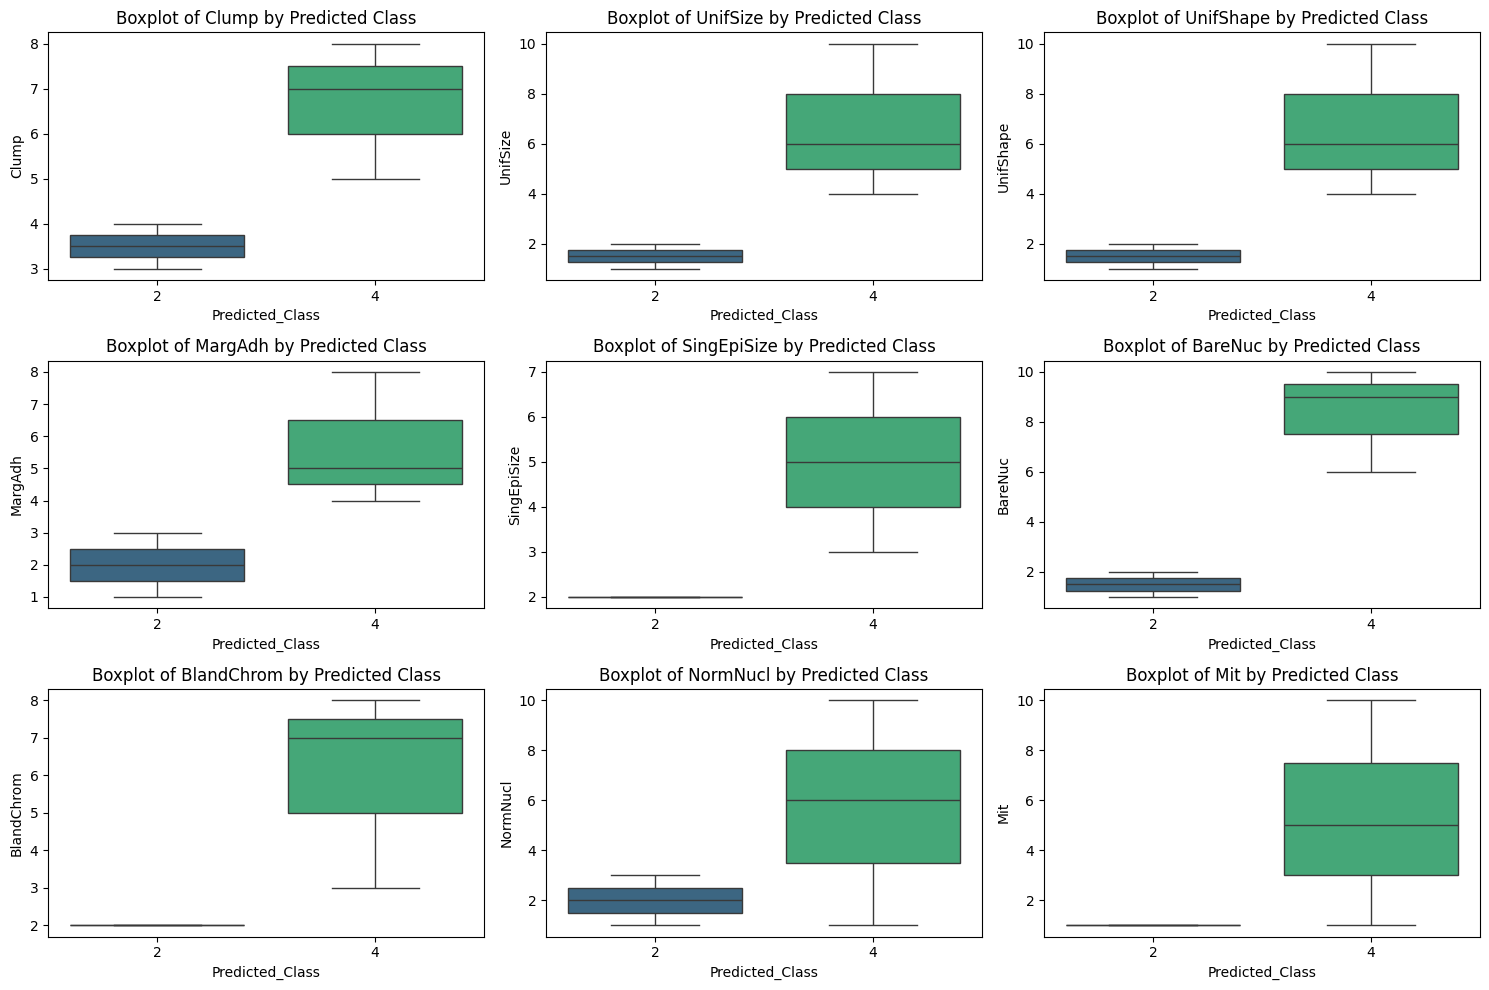

In [168]:
# Create boxplots for each feature by predicted class
features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
            'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_new, x='Predicted_Class', y=feature, palette='viridis')
    plt.title(f'Boxplot of {feature} by Predicted Class')

plt.tight_layout()
plt.show()


**Save Visualizations to Files**

In [169]:
# Save the last figure as an image
plt.figure(figsize=(8, 6))
sns.countplot(data=df_new, x='Predicted_Class', palette='viridis')
plt.title('Distribution of Predicted Cancer Classes')
plt.xlabel('Predicted Class (2 = Benign, 4 = Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.savefig('/content/svm/MyDrive/svm(cancer)/predicted_class_distribution.png')
plt.close()


<ipython-input-169-00af7f5f5465>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x='Predicted_Class', palette='viridis')


In [ ]:
# Create a new CSV file to store the predictions
output_file_path = '/content/svm/MyDrive/svm(cancer)/predicted_cancer_classes.csv'
df_new[['ID', 'Predicted_Class']].to_csv(output_file_path, index=False)

# Print the path to the saved file
print(f'Predictions saved to: {output_file_path}')


Predictions saved to: /content/svm/MyDrive/svm(cancer)/predicted_cancer_classes.csv
